# Preparing the dataset for hippocampus segmentation

In this notebook you will use the skills and methods that we have talked about during our EDA Lesson to prepare the hippocampus dataset using Python. Follow the Notebook, writing snippets of code where directed so using Task comments, similar to the one below, which expects you to put the proper imports in place. Write your code directly in the cell with TASK comment. Feel free to add cells as you see fit, but please make sure that code that performs that tasked activity sits in the same cell as the Task comment.


In [1]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import sys
import os
import shutil
import numpy as np
import pandas as pd
import nibabel as nib

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

print(f'Python version: {sys.version}')
print(f'Numpy version: {np.__version__}')
print(f'Pandas version: {pd.__version__}')

Python version: 3.8.3 (default, May 19 2020, 18:47:26) 
[GCC 7.3.0]
Numpy version: 1.18.5
Pandas version: 1.0.5


It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

NiBabel is a python library for working with neuro-imaging formats (including NIFTI) that we have used in some of the exercises throughout the course. Our volumes and labels are in NIFTI format, so we will use nibabel to load and inspect them.

NiBabel documentation could be found here: https://nipy.org/nibabel/

Our dataset sits in two directories - *images* and *labels*. Each image is represented by a single file (we are fortunate to have our data converted to NIFTI) and has a corresponding label file which is named the same as the image file.

Note that our dataset is "dirty". There are a few images and labels that are not quite right. They should be quite obvious to notice, though. The dataset contains an equal amount of "correct" volumes and corresponding labels, and you don't need to alter values of any samples in order to get the clean dataset.

In [2]:
## define file paths:
path_data = '../data/'
path_train_imgs = f'{path_data}TrainingSet/images/'
path_train_lbls = f'{path_data}TrainingSet/labels/'

In [3]:
# TASK: Your data sits in directory /data/TrainingSet.
# Load an image and a segmentation mask into variables called image and label

## get all file names:
filenames_train_imgs = [file for file in os.listdir(path_train_imgs) if file[-7:]=='.nii.gz']
filenames_train_lbls = [file for file in os.listdir(path_train_lbls) if file[-7:]=='.nii.gz']

In [4]:
print(f'# images: {len(filenames_train_imgs)}')
print(f'# labels: {len(filenames_train_lbls)}')

# images: 263
# labels: 262


1 label is missing. Therefore we get rid of the image that has no corresponding label file

In [5]:
## get intersection of all (image, label) pairs (for each image a label has to exist):
filenames_train = np.intersect1d(filenames_train_imgs, filenames_train_lbls)

In [6]:
## list all available unique shapes
available_shapes = []
label_missmatch = []
for filename in filenames_train:
    img_shape = nib.load(f'{path_train_imgs}{filename}').shape
    lbl_shape = nib.load(f'{path_train_lbls}{filename}').shape
    if img_shape==lbl_shape:
        available_shapes += [np.array(img_shape)]
    else:
        print(f'file {filename} has miss-matching shapes ' +
              f'between image ({img_shape}) and label ({lbl_shape}).')
        label_missmatch += [filename]
## get all shapes (and their value counts) of the images:
np.unique(available_shapes, return_counts=True, axis=0)

file hippocampus_010.nii.gz has miss-matching shapes between image ((512, 512, 241)) and label ((36, 50, 31)).
file hippocampus_281.nii.gz has miss-matching shapes between image ((512, 512, 31)) and label ((512, 512, 94)).


(array([[31, 50, 36],
        [31, 54, 34],
        [32, 45, 38],
        [32, 45, 41],
        [32, 46, 42],
        [32, 47, 32],
        [32, 47, 41],
        [32, 48, 34],
        [32, 49, 30],
        [32, 49, 36],
        [32, 49, 38],
        [32, 51, 28],
        [32, 51, 31],
        [32, 52, 34],
        [32, 53, 38],
        [32, 54, 34],
        [33, 44, 40],
        [33, 44, 41],
        [33, 44, 42],
        [33, 46, 38],
        [33, 47, 34],
        [33, 47, 35],
        [33, 47, 37],
        [33, 47, 38],
        [33, 47, 42],
        [33, 48, 34],
        [33, 48, 38],
        [33, 49, 32],
        [33, 49, 37],
        [33, 49, 40],
        [33, 50, 29],
        [33, 50, 35],
        [33, 51, 28],
        [33, 51, 32],
        [33, 51, 34],
        [33, 51, 37],
        [33, 52, 27],
        [33, 52, 37],
        [33, 53, 26],
        [33, 53, 28],
        [33, 54, 39],
        [33, 55, 29],
        [33, 59, 29],
        [34, 45, 43],
        [34, 46, 34],
        [3

Looks like we have quite a fiew different image shapes.

On top we have two (image, label)-pairs with miss-matching shape. The image shapes of these files look like they have been forgotten to be cropped. We will ignore these images and delete them from our filename list

In [7]:
## delete shape missmatching files from list:
filenames_train = [file for file in filenames_train if file not in label_missmatch]

In [8]:
shape_mean = (np.array(available_shapes)[:, 0]).mean()
shape_std = (np.array(available_shapes)[:, 0]).std()
print(f'dimension 0: shape mean: {shape_mean}, shape std: {shape_std}')
shape_mean = (np.array(available_shapes)[:, 1]).mean()
shape_std = (np.array(available_shapes)[:, 1]).std()
print(f'dimension 1: shape mean: {shape_mean}, shape std: {shape_std}')

shape_mean = (np.array(available_shapes)[:, 2]).mean()
shape_std = (np.array(available_shapes)[:, 2]).std()
print(f'dimension 2: shape mean: {shape_mean}, shape std: {shape_std}')


dimension 0: shape mean: 35.37692307692308, shape std: 1.9797644949895685
dimension 1: shape mean: 49.98076923076923, shape std: 3.253934805120768
dimension 2: shape mean: 35.65384615384615, shape std: 4.210264998898139


The remaining images seem to have similar shapes (small standard deviation of shape sizes in all dimensions)

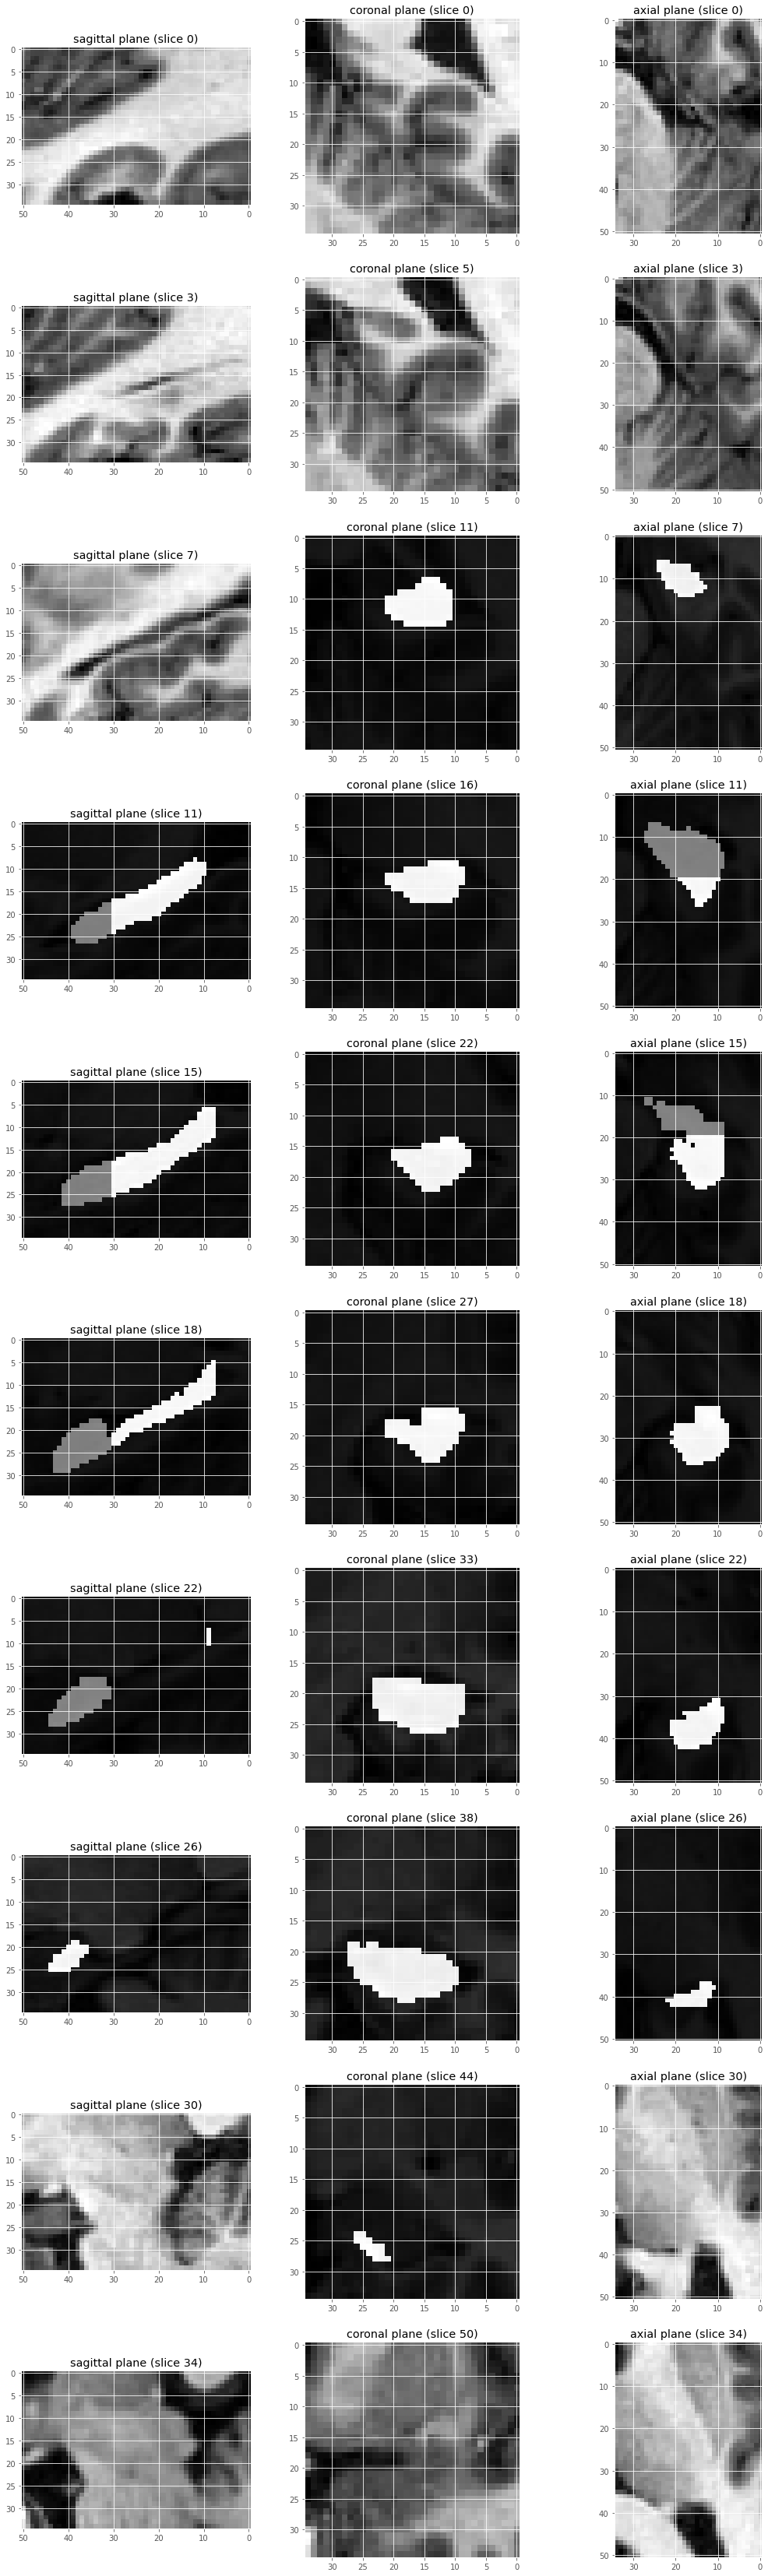

In [143]:
# Nibabel can present your image data as a Numpy array by calling the method get_fdata()
# The array will contain a multi-dimensional Numpy array with numerical values representing voxel intensities. 
# In our case, images and labels are 3-dimensional, so get_fdata will return a 3-dimensional array. You can verify this
# by accessing the .shape attribute. What are the dimensions of the input arrays?

# TASK: using matplotlib, visualize a few slices from the dataset, along with their labels. 
# You can adjust plot sizes like so if you find them too small:
# plt.rcParams["figure.figsize"] = (10,10)


## select image (and label) to visualize:
img_nr = 0
intensity_factor = 500
image = nib.load(f'{path_train_imgs}{filenames_train[img_nr]}')
label = nib.load(f'{path_train_lbls}{filenames_train[img_nr]}')
## import selected image and label:
image_volume = image.get_fdata()
label_volume = label.get_fdata()

## select how many slices in each cardinal plane to plot:
nr_slices = 10

range0 = np.linspace(0, image_volume.shape[0]-1, nr_slices)
range1 = np.linspace(0, image_volume.shape[1]-1, nr_slices)
range2 = np.linspace(0, image_volume.shape[2]-1, nr_slices)
fig, axarr = plt.subplots(nr_slices, 3, figsize=(3*6, 6*nr_slices))
for i in range(nr_slices):
    slice_nr0 = int(range0[i])
    slice_nr1 = int(range1[i])
    slice_nr2 = int(range2[i])
    axarr[i, 0].imshow(np.rot90(image_volume[slice_nr0, :, :]) + np.rot90(label_volume[slice_nr0, :, :])*intensity_factor, cmap='gray')
    ttl = f'sagittal plane (slice {slice_nr0})'
    axarr[i, 0].set_title(ttl)
    axarr[i, 0].invert_xaxis()

    
    axarr[i, 1].imshow(np.rot90(image_volume[:, slice_nr1, :]) + np.rot90(label_volume[:, slice_nr1, :])*intensity_factor, cmap='gray')
    ttl = f'coronal plane (slice {slice_nr1})'
    axarr[i, 1].set_title(ttl)
    axarr[i, 1].invert_xaxis()

    
    axarr[i, 2].imshow(np.rot90(image_volume[:, :, slice_nr2]) + np.rot90(label_volume[:, :, slice_nr2])*intensity_factor, cmap='gray')
    ttl = f'axial plane (slice {slice_nr2})'
    axarr[i, 2].set_title(ttl)
    axarr[i, 2].invert_xaxis()

Load volume into 3D Slicer to validate that your visualization is correct and get a feel for the shape of structures.Try to get a visualization like the one below (hint: while Slicer documentation is not particularly great, there are plenty of YouTube videos available! Just look it up on YouTube if you are not sure how to do something)

![3D slicer](img/Slicer.png)

In [10]:
# Stand out suggestion: use one of the simple Volume Rendering algorithms that we've
# implemented in one of our earlier lessons to visualize some of these volumes

## Looking at single image data
In this section we will look closer at the NIFTI representation of our volumes. In order to measure the physical volume of hippocampi, we need to understand the relationship between the sizes of our voxels and the physical world.

In [11]:
## import all images with nibabel:
images = []
labels = []
for filename in filenames_train:
    images += [nib.load(f'{path_train_imgs}{filename}')]
    labels += [nib.load(f'{path_train_lbls}{filename}')]

In [12]:
# Nibabel supports many imaging formats, NIFTI being just one of them. I told you that our images 
# are in NIFTI, but you should confirm if this is indeed the format that we are dealing with
# TASK: using .header_class attribute - what is the format of our images?

In [13]:
## get format of image files
{img.header_class for img in images}

{nibabel.nifti1.Nifti1Header}

In [14]:
## get format of label files
{lbl.header_class for lbl in labels}

{nibabel.nifti1.Nifti1Header}

Further down we will be inspecting .header attribute that provides access to NIFTI metadata. You can use this resource as a reference for various fields: https://brainder.org/2012/09/23/the-nifti-file-format/

In [15]:
# TASK: How many bits per pixel are used?

In [17]:
lst = []
for img in images:
    lst += [img.header['datatype']]
pd.Series(lst).value_counts()

16    205
2      55
dtype: int64

In [24]:
lst = []
for lbl in labels:
    lst += [lbl.header['datatype']]
pd.Series(lst).value_counts()

2     258
16      2
dtype: int64

In [48]:
images[1].header['bitpix']

array(32, dtype=int16)

We have two diffrent types of bits per pixels:
the first entry above represents a code (see https://brainder.org/2012/09/23/the-nifti-file-format/):
- 16: 32 bit (floats)
- 2: 8 bit (unsigned char)
Most of the images (205) are 32 bit voxel images.
Alternatively you could use images[1].header['bitpix']

In [ ]:
# TASK: What are the units of measurement?

In [28]:
lst = []
for img in images:
    lst += [img.header['xyzt_units']]
pd.Series(lst).value_counts()

10    260
dtype: int64

In [30]:
{img.header.get_xyzt_units() for img in images}

{('mm', 'sec')}

In [31]:
{lbl.header.get_xyzt_units() for lbl in labels}

{('mm', 'sec')}

The units of measurements are for both images and labels in mili-meter
We can get it in two ways:
- by code: 10 -> composed of 2: mm and 8: sec
- by direct output

In [ ]:
# TASK: Do we have a regular grid? What are grid spacings?

In [42]:
lst = []
for img in images:
    lst += [img.header['pixdim']]
np.unique(np.array(lst), axis=0)

array([[1., 1., 1., 1., 1., 0., 0., 0.]], dtype=float32)

In [43]:
lst = []
for lbl in labels:
    lst += [lbl.header['pixdim']]
np.unique(np.array(lst), axis=0)

array([[1., 1., 1., 1., 1., 0., 0., 0.]], dtype=float32)

We have a regular grid. In each dimension we have a spatial spacing of 1 mm.
The first three dimensions represent spatial coordinates: x, y, z.
The 4. dimension represents the time: An image was taken each second.

In [ ]:
# TASK: What dimensions represent axial, sagittal, and coronal slices? How do you know?

In [95]:
images[1].header.get_base_affine()

array([[ -1. ,   0. ,   0. ,  16.5],
       [  0. ,   1. ,   0. , -25.5],
       [  0. ,   0. ,   1. , -17. ],
       [  0. ,   0. ,   0. ,   1. ]])

In [96]:
images[1].header.get_best_affine()

array([[1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

Conventions in NIFTI files:
- Voxel coordinates refer to the center of each voxel,
- The world coordinate system is assumed to be ras: 
    - +x is Right (left is 0, increasing coordinates go to the right)
    - +y is Anterior (from back (posterior) to front (anterior))
    - +z is Superior (from bottom (inferior) to top (superior))

dimension meanings:
- Fixing dimension 0 yields sagittal
- fixing dimension 1 yields coronal
- figing dimension 2 yields axial

The affine transformation matrix is equal to an Identity matrix

In [ ]:
# By now you should have enough information to decide what are dimensions of a single voxel
# TASK: Compute the volume (in mm³) of a hippocampus using one of the labels you've loaded. 
# You should get a number between ~2200 and ~4500

In [63]:
lst = []
for lbl in labels:
    lbl_data = lbl.get_fdata()
    lst += [(lbl_data>0).sum()]
volumes = np.array(lst)

In [66]:
volumes.min()

2382

In [68]:
volumes.max()

4401

All volumes are in the range between ~2200 and ~4500. Apparently we already filtered out all outliers (see above)

## Plotting some charts

In [ ]:
# TASK: Plot a histogram of all volumes that we have in our dataset and see how 
# our dataset measures against a slice of a normal population represented by the chart below.

<img src="img/nomogram_fem_right.svg" width=400 align=left>

Text(0, 0.5, 'frequency')

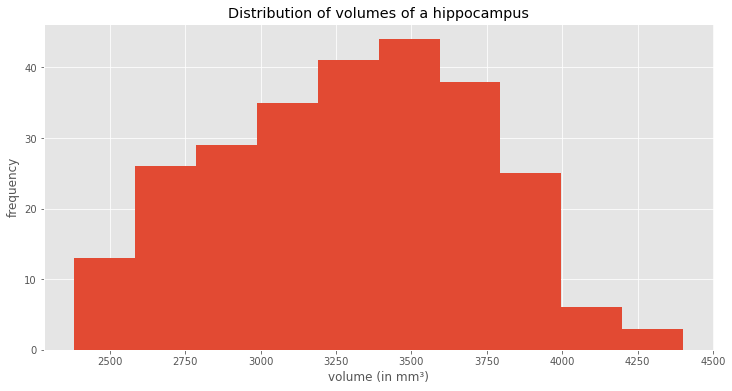

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.hist(volumes)
ax.set_title('Distribution of volumes of a hippocampus')
ax.set_xlabel('volume (in mm³)')
ax.set_ylabel('frequency')

Do you see any outliers? Why do you think it's so (might be not immediately obvious, but it's always a good idea to inspect) outliers closer. If you haven't found the images that do not belong, the histogram may help you.

In the real world we would have precise information about the ages and conditions of our patients, and understanding how our dataset measures against population norm would be the integral part of clinical validation that we talked about in last lesson. Unfortunately, we do not have this information about this dataset, so we can only guess why it measures the way it is. If you would like to explore further, you can use the [calculator from HippoFit project](http://www.smanohar.com/biobank/calculator.html) to see how our dataset compares against different population slices

Did you notice anything odd about the label files? We hope you did! The mask seems to have two classes, labeled with values `1` and `2` respectively. If you visualized sagittal or axial views, you might have gotten a good guess of what those are. Class 1 is the anterior segment of the hippocampus and class 2 is the posterior one. 

For the purpose of volume calculation we do not care about the distinction, however we will still train our network to differentiate between these two classes and the background

In [ ]:
# TASK: Copy the clean dataset to the output folder inside section1/out. You will use it in the next Section

In [90]:
path_out_imgs = 'out/data/TrainingSet/images/'
path_out_lbls = 'out/data/TrainingSet/labels/'
os.makedirs(path_out_imgs, exist_ok=True)
os.makedirs(path_out_lbls, exist_ok=True)

for filename in filenames_train:
    img = f'{path_train_imgs}{filename}'
    lbl = f'{path_train_imgs}{filename}'
    shutil.copyfile(img, f'{path_out_imgs}{filename}')
    shutil.copyfile(lbl, f'{path_out_lbls}{filename}')

## Final remarks

Congratulations! You have finished Section 1. 

In this section you have inspected a dataset of MRI scans and related segmentations, represented as NIFTI files. We have visualized some slices, and understood the layout of the data. We have inspected file headers to understand what how the image dimensions relate to the physical world and we have understood how to measure our volume. We have then inspected dataset for outliers, and have created a clean set that is ready for consumption by our ML algorithm. 

In the next section you will create training and testing pipelines for a UNet-based machine learning model, run and monitor the execution, and will produce test metrics. This will arm you with all you need to use the model in the clinical context and reason about its performance!